In [1]:
#hide
from utils import *
from fastai2.vision.widgets import *

# From Model to Production

## The Practice of Deep Learning

### Starting Your Project

### The State of Deep Learning

#### Computer vision

#### Text (natural language processing)

#### Combining text and images

#### Tabular data

#### Recommendation systems

#### Other data types

### The Drivetrain Approach

## Gathering Data

To download images with Bing Image Search, sign up at Microsoft for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [2]:
key = ''

In [4]:
search_images_bing

<function utils.search_images_bing(key, term, min_sz=128)>

In [2]:
key

NameError: name 'key' is not defined

In [14]:
#results = search_images_bing(key, 'grizzly bear')
results = search_images_bing(key, 'Brahminy Blind Snake')
ims = results.attrgot('content_url')
len(ims)
ims[2]

'http://www.californiaherps.com/noncal/misc/miscsnakes/images/rbramunuskauai12073.jpg'

In [14]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [16]:
dest = 'images/snake.jpg'
download_url(ims[2], dest)

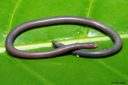

In [17]:
im = Image.open(dest)
im.to_thumb(128,128)

In [57]:
#bear_types = 'grizzly','black','teddy'
#path = Path('bears')
snake_types = 'Brahminy Blind Snake','Southern Copperhead','Western Cottonmouth', 'Timber Rattlesnake', 'Western Diamondback Rattlesnake', 'Western Pygmy Rattlesnake', 'Desert Massasauga', 'Texas Coralsnake', 'Texas Glossy Snake', 'Northern Scarlet Snake', 'Buttermilk Racer','Yellowbelly Racer','Tan Racer','Eastern Coachwhip','Mississippi Ringneck Snake', 'Western Mud Snake', 'Rough Earthsnake', 'Eastern Hognose Snake', 'Prairie Kingsnake', 'Western Milksnake', 'Speckled Kingsnake','Gulf Swampsnake','Gulf Salt Marsh Snake', 'Mississippi Green Watersnake','Plain-bellied Water Snake', 'Broad-banded Water Snake', 'Diamondback Watersnake', 'Rough Greensnake','Smooth Greensnake', 'Western Rat Snake',"Slowinski's Cornsnake",'Louisiana Pinesnake',"Graham's Crayfish Snake","DeKay's Brownsnake",'Florida Redbelly Snake','Flat-headed Snake', 'Gulf Coast Ribbon Snake', 'Eastern Garter Snake', 'Smooth Earth Snake',
#path = Path('snakes')
path = Path('/storage/snakes')
snake_types

('Brahminy Blind Snake',
 'Southern Copperhead',
 'Western Cottonmouth',
 'Timber Rattlesnake',
 'Western Diamondback Rattlesnake',
 'Western Pygmy Rattlesnake',
 'Desert Massasauga',
 'Texas Coralsnake',
 'Texas Glossy Snake',
 'Northern Scarlet Snake',
 'Buttermilk Racer',
 'Yellowbelly Racer',
 'Tan Racer',
 'Eastern Coachwhip',
 'Mississippi Ringneck Snake',
 'Western Mud Snake',
 'Rough Earthsnake',
 'Eastern Hognose Snake',
 'Prairie Kingsnake',
 'Western Milksnake',
 'Speckled Kingsnake',
 'Gulf Swampsnake',
 'Gulf Salt Marsh Snake',
 'Mississippi Green Watersnake',
 'Plain-bellied Water Snake',
 'Broad-banded Water Snake',
 'Diamondback Watersnake',
 'Rough Greensnake',
 'Smooth Greensnake',
 'Western Rat Snake',
 "Slowinski's Cornsnake",
 'Louisiana Pinesnake',
 "Graham's Crayfish Snake",
 "DeKay's Brownsnake",
 'Florida Redbelly Snake',
 'Flat-headed Snake',
 'Gulf Coast Ribbon Snake',
 'Eastern Garter Snake',
 'Smooth Earth Snake')

In [58]:
path.absolute()

Path('/storage/snakes')

In [44]:
#if not path.exists():
    path.mkdir()
    for o in snake_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} snake')
        download_images(dest, urls=results.attrgot('content_url'))

IndentationError: unexpected indent (<ipython-input-44-eceb026ae62e>, line 2)

In [59]:
fns = get_image_files(path)
print(len(fns))
fns

4465


(#4465) [Path("/storage/snakes/Graham's Crayfish Snake/00000049.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000062.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000026.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000060.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000007.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000037.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000013.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000015.jpg"),Path("/storage/snakes/Graham's Crayfish Snake/00000016.jpeg"),Path("/storage/snakes/Graham's Crayfish Snake/00000133.jpg")...]

In [60]:
failed = verify_images(fns)
failed

(#0) []

In [25]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

### End sidebar

In [21]:

??get_image_files
#??verify_images
4

4

## From Data to DataLoaders

In [61]:
snakes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [62]:
dls = snakes.dataloaders(path)

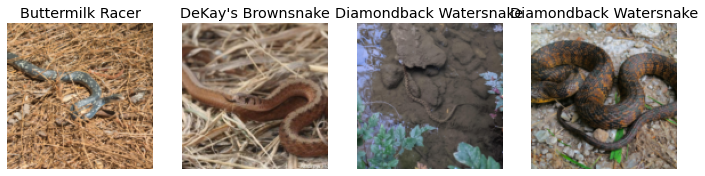

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

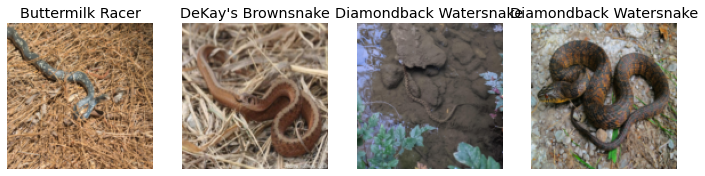

In [10]:
snakes = snakes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = snakes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

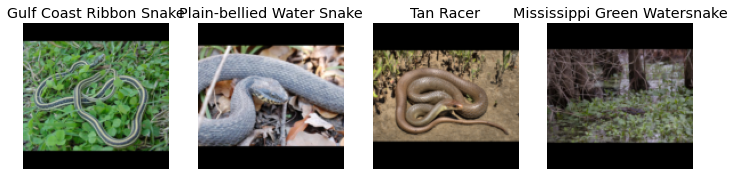

In [30]:
snakes = snakes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = snakes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

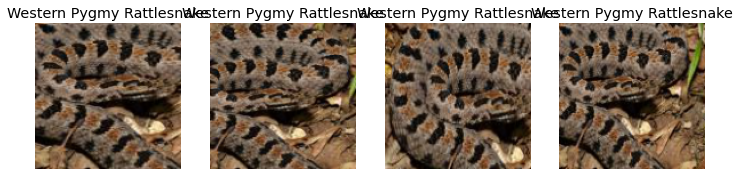

In [31]:
snakes = snakes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = snakes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Data Augmentation

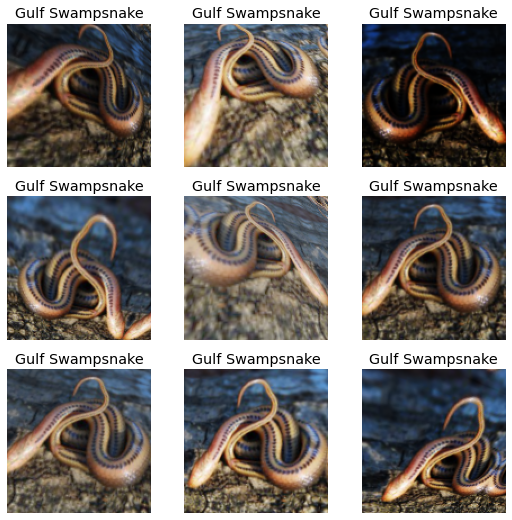

In [47]:
snakes = snakes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = snakes.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=3, unique=True)

## Training Your Model, and Using It to Clean Your Data

In [63]:
snakes = snakes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = snakes.dataloaders(path)

In [64]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.799449,2.085012,0.546473,00:34


epoch,train_loss,valid_loss,error_rate,time
0,2.193804,1.736430,0.470325,00:42
1,1.857371,1.543564,0.430011,00:42
2,1.480425,1.420374,0.372900,00:43
3,1.204692,1.389938,0.360582,00:43


In [65]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.825202,2.000474,0.557671,00:50


epoch,train_loss,valid_loss,error_rate,time
0,2.096314,1.589554,0.443449,01:06
1,1.693690,1.376928,0.391937,01:05
2,1.295120,1.311702,0.348264,01:07
3,1.017140,1.297369,0.339306,01:07


In [67]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.051927,1.885309,0.486002,01:10


epoch,train_loss,valid_loss,error_rate,time
0,1.651473,1.521023,0.407615,01:30
1,1.367062,1.323485,0.360582,01:30
2,0.990714,1.167547,0.320269,01:30
3,0.683243,1.140607,0.309071,01:30


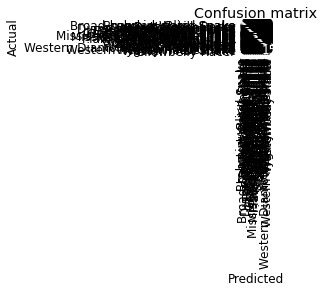

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

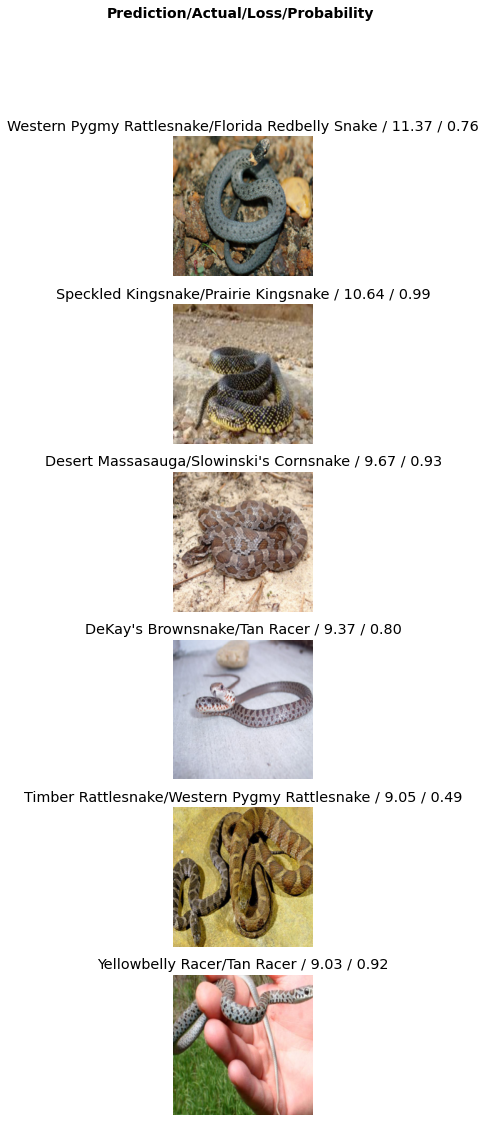

In [68]:
interp.plot_top_losses(6, nrows=6)

In [7]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: "/notebooks/course-v4/nbs/snakes/DeKay's Brownsnake/00000127.jpg"

In [10]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

## Turning Your Model into an Online Application

### Using the Model for Inference

In [69]:
learn.export()

In [2]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [3]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('images/grizzly.jpg')

('Eastern Hognose Snake',
 tensor(8),
 tensor([1.2792e-02, 7.9485e-04, 8.2509e-04, 1.6605e-03, 1.2811e-03, 1.5769e-01, 5.7435e-05, 1.9518e-04, 3.6857e-01, 9.9770e-03, 2.8529e-05, 1.7337e-04, 2.3600e-04, 8.6656e-03, 2.8435e-03, 2.3240e-03,
         9.2129e-04, 1.2354e-04, 6.5440e-04, 3.6601e-05, 1.2422e-05, 4.4638e-03, 1.9540e-01, 5.9754e-04, 4.0926e-04, 2.5560e-02, 2.0752e-03, 1.4896e-03, 1.6336e-04, 2.2768e-03, 1.6622e-05, 1.0432e-02,
         5.5997e-03, 1.5026e-01, 1.1878e-04, 6.2506e-04, 2.9435e-02, 8.3209e-04, 3.8567e-04]))

In [4]:
learn_inf.predict('images/chapter1_cat_example.jpg')

('Gulf Coast Ribbon Snake',
 tensor(12),
 tensor([0.0553, 0.0549, 0.0148, 0.0082, 0.0086, 0.0089, 0.0481, 0.0004, 0.1815, 0.0879, 0.0029, 0.0018, 0.2276, 0.0809, 0.0046, 0.0189, 0.0019, 0.0010, 0.0229, 0.0018, 0.0054, 0.0008, 0.0259, 0.0055,
         0.0009, 0.0027, 0.0271, 0.0025, 0.0075, 0.0004, 0.0115, 0.0246, 0.0144, 0.0179, 0.0052, 0.0038, 0.0026, 0.0066, 0.0018]))

In [5]:
learn_inf.dls.vocab

(#39) ['Brahminy Blind Snake','Broad-banded Water Snake','Buttermilk Racer',"DeKay's Brownsnake",'Desert Massasauga','Diamondback Watersnake','Eastern Coachwhip','Eastern Garter Snake','Eastern Hognose Snake','Flat-headed Snake'...]

### Creating a Notebook App from the Model

In [6]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [47]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [21]:
img = PILImage.create(btn_upload.data[0])

IndexError: list index out of range

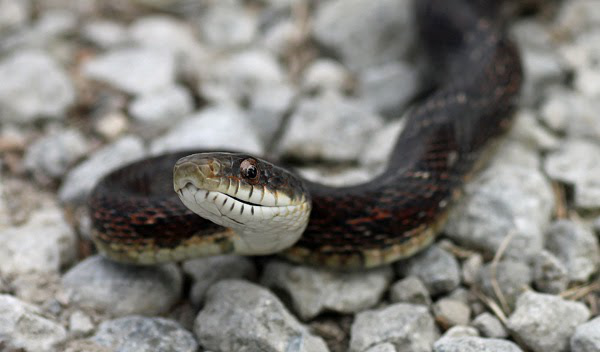

In [22]:
img

In [23]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [24]:
pred,pred_idx,probs = learn_inf.predict(img)

In [106]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
#lbl_pred

In [112]:
lbl_debug = widgets.Textarea()
lbl_debug.placeholder = "Waiting..."
#lbl_debug

In [113]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [118]:
def on_click_classify(change):
    #print(btn_upload.data)
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    temp = sorted(list(zip(probs, learn_inf.dls.vocab)),  key = lambda x: x[0])
    temp2 = temp[::-1][0:10]
    temp3 = list(map(lambda x: x[1] + ": " +str(x[0].item()), temp2))
    #temp4 = str([' '.join(tups) for tups in temp3])
    #print(probs)
    #print(learn_inf.dls.vocab)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    lbl_debug.value = "\n".join(temp3)

btn_run.on_click(on_click_classify)

In [115]:
print(probs)
print(learn_inf.dls.vocab)
temp = sorted(list(zip(probs, learn_inf.dls.vocab)),  key = lambda x: x[0])
temp2 = temp[::-1][0:5]
#temp3 = list(map(lambda x: (x[1], str(x[0].item())), temp2))
temp3 = list(map(lambda x: x[1] + ": " +str(x[0].item()), temp2))
temp3
print(" \n".join(temp3))
#res = list(map(" ".join, temp3)) 
#temp4 = str([' '.join(tups) for tups in temp3])
#temp4

tensor([0.0069, 0.0025, 0.0144, 0.0035, 0.0029, 0.2845, 0.0034, 0.1222, 0.0015, 0.0014, 0.0069, 0.0237, 0.0319, 0.1158, 0.0397, 0.0050, 0.0334, 0.0064, 0.0016, 0.0383, 0.0400, 0.0031, 0.0016, 0.0017,
        0.0020, 0.0073, 0.0016, 0.0201, 0.0007, 0.0038, 0.0056, 0.0005, 0.0195, 0.0005, 0.0030, 0.0064, 0.0004, 0.0536, 0.0827])
(#39) ['Brahminy Blind Snake','Broad-banded Water Snake','Buttermilk Racer',"DeKay's Brownsnake",'Desert Massasauga','Diamondback Watersnake','Eastern Coachwhip','Eastern Garter Snake','Eastern Hognose Snake','Flat-headed Snake'...]
Diamondback Watersnake: 0.28449371457099915 
 Eastern Garter Snake: 0.12222038209438324 
 Gulf Salt Marsh Snake: 0.11576935648918152 
 Yellowbelly Racer: 0.08269371092319489 
 Western Rat Snake: 0.053648367524147034


In [119]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [120]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred, lbl_debug])

### Turning Your Notebook into a Real App

In [75]:
#hide
#!pip install voila
#!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 5.9 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 183 kB 73.9 MB/s eta 0:00:01
Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
      voila 0.1.22 OK
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?


### Deploying your app

## How to Avoid Disaster

### Unforeseen Consequences and Feedback Loops

## Get Writing!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.